# Progress report 3

*Asura Enkhbayar, 18.06.2020*

Several plots and insights for individual research programs

In [2]:
from pathlib import Path

from IPython.display import Markdown as md

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib_venn import venn3
import pandas as pd
import seaborn as sns

import numpy as np

from tracking_grants import references_f, articles_f, wos_f, altmetric_f

In [3]:
# Seaborn styles
sns.set_style("darkgrid")

# Matplotlib figure configuration fonts and figsizes
plt.rcParams.update({
    'font.family':'sans-serif',
    'font.size': 16.0,
    'text.usetex': False,
    'figure.figsize': (11.69,8.27)
})

# Color palette
cm = "Paired"
cp3 = sns.color_palette(cm, 3)
cp10 = sns.color_palette(cm, 10)

## Load Data

In [4]:
# Load references
refs = pd.read_csv(references_f, index_col="reference_id")

In [5]:
# Load matched articles
articles = pd.read_csv(articles_f, index_col="DOI")
articles.index = articles.index.str.lower()

In [6]:
# Load metrics from WoS
wos = pd.read_csv(wos_f,  low_memory=False, index_col="DOI")
wos.columns = [x.lower() for x in wos.columns.tolist()]
wos.index = wos.index.str.lower()

wos = wos.rename(columns={'relative citation score':'citation_score'})

In [7]:
# Load metrics from Altmetric
altmetrics = pd.read_json(altmetric_f).T

# Filter out all articles had not altmetrics
altmetrics = altmetrics[altmetrics.altmetric_id.notna()]

In [8]:
dates = ["last_updated", "published_on", "added_on"]
for d in dates:
    altmetrics[d] = pd.to_datetime(altmetrics[d], unit="s")

str_cols = ["pmid", "pmc", "altmetric_id", "doi", 'hollis_id', "arxiv_id"]
for _ in str_cols:
    altmetrics[_] = altmetrics[_].astype(str)
    
metric_cols = {
    'cited_by_posts_count': 'posts_count',
    'cited_by_rh_count': 'research_highlight',
    'cited_by_tweeters_count': 'twitter_accounts',
    'cited_by_patents_count': 'patents',
    'cited_by_msm_count': 'news_outlets',
    'cited_by_feeds_count': 'blogs',
    'cited_by_fbwalls_count': 'fb_pages',
    'cited_by_qna_count': 'qna_count',
    'cited_by_videos_count': 'videos',
    'cited_by_peer_review_sites_count': 'peer_reviews',
    'cited_by_weibo_count': 'weibo',
    'cited_by_gplus_count': 'gplus',
    'cited_by_rdts_count': 'reddit_threads',
    'cited_by_policies_count': 'policies',
    'cited_by_syllabi_count': 'syllabi',
    'cited_by_linkedin_count': 'linkedin',
    'cited_by_wikipedia_count': 'wikipedia',
}
altmetrics = altmetrics.rename(columns=metric_cols)
metric_cols = list(metric_cols.values())

altmetrics[metric_cols] = altmetrics[metric_cols].astype(float)

cols_to_keep = metric_cols + dates + str_cols + ['subjects', 'scopus_subjects']
altmetrics = altmetrics[cols_to_keep]

# Transform all DOIs to lowercase
altmetrics.index = altmetrics.index.str.lower()

In [9]:
metrics = articles[[]].merge(altmetrics[metric_cols], left_index=True, right_index=True, how="left")
metrics = metrics.merge(wos[["citations", "citation_score"]], left_index=True, right_index=True, how="left")

In [10]:
# Replace articles with 0 citations as NaN
metrics = metrics.replace(0.0, np.nan)

## Results

In [11]:
# Choose program to explore (TSCRP, NFRP, PCRP, PRORP)
selected_program = "TSCRP"

results = articles.reset_index().merge(refs[refs.program=="TSCRP"][['grant_id', 'reference']], left_on="reference", right_on="reference", how="inner")
results = results.merge(metrics, left_on="DOI", right_index=True)

In [12]:
results.columns

Index(['DOI', 'article_id', 'reference', 'score', 'type', 'n_grants', 'pmid',
       'grant_id', 'posts_count', 'research_highlight', 'twitter_accounts',
       'patents', 'news_outlets', 'blogs', 'fb_pages', 'qna_count', 'videos',
       'peer_reviews', 'weibo', 'gplus', 'reddit_threads', 'policies',
       'syllabi', 'linkedin', 'wikipedia', 'citations', 'citation_score'],
      dtype='object')

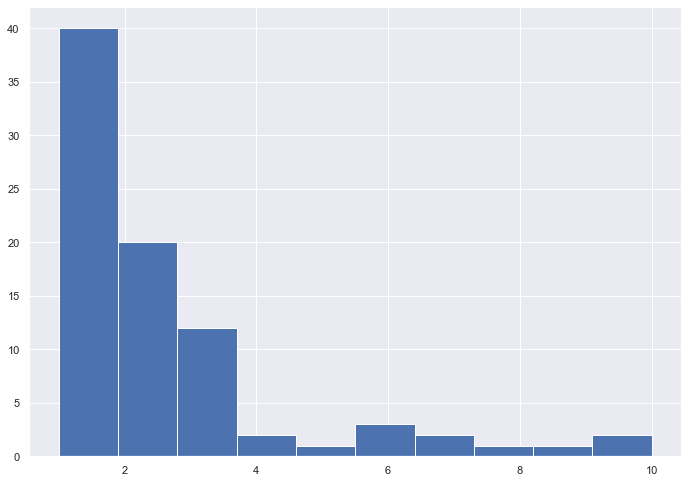

In [12]:
results.groupby("grant_id").size().hist()

In [13]:
mean_metrics = results.groupby("grant_id")[['citation_score', 'citations', 'fb_pages', 'twitter_accounts']].mean()

(0.0, 1200.0)

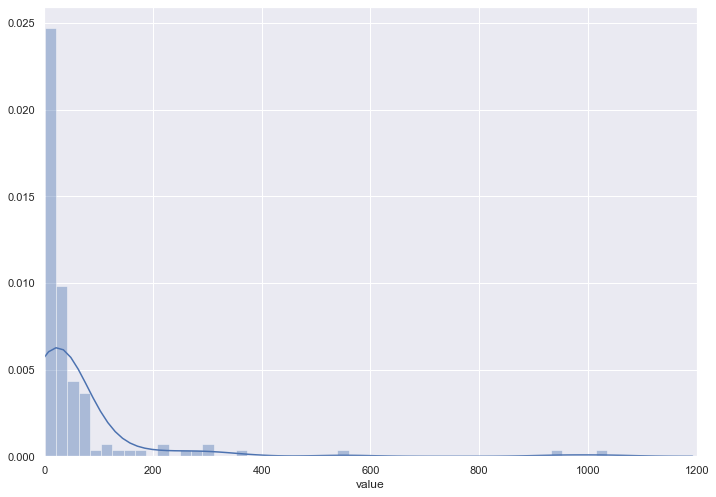

In [14]:
pdf = results.melt(id_vars="grant_id", value_vars="citations")
sns.distplot(pdf.value.dropna())
plt.xlim(0,1200)

In [1]:
pdf = results.melt(id_vars="grant_id", value_vars=['citation_score', 'citations', 'fb_pages', 'twitter_accounts'])
sns.boxplot(y="variable", x="value", data=pdf)
plt.xlim(0,25);

NameError: name 'results' is not defined